In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("nba2021.csv")
print(data.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [3]:
data_target = data['Pos']
data = data.drop(['Player','Pos','Age','Tm','G','GS','MP','FG','3P','3PA','2P','2PA','FT','FTA','TOV','PF'],axis = 1)
print(data.columns)
print(data.shape)

Index(['FGA', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'PTS'],
      dtype='object')
(497, 13)


/Users/rohitkavuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rohitkavuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

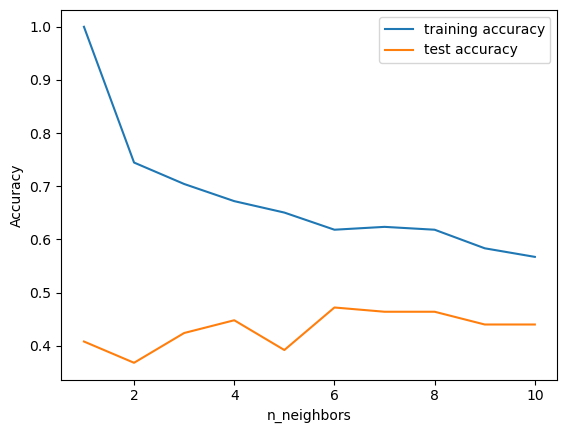

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train_feature, test_feature, train_class, test_class = train_test_split(
    data, data_target, stratify=data_target, random_state=0)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_feature, train_class)
    # record training set accuracy
    training_accuracy.append(knn.score(train_feature, train_class))
    # record generalization accuracy
    test_accuracy.append(knn.score(test_feature, test_class))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [6]:
train_feature, test_feature, train_class, test_class = train_test_split(
    data, data_target, stratify=data_target,random_state =0)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(train_feature, train_class)
y_test = np.array(test_class)
y_pred = knn.predict(test_feature)
print("Test set accuracy: {:.2f}".format(knn.score(test_feature, test_class)))
c = 0
sg = 0
pg = 0
pf = 0
sf = 0
for i in range(len(y_pred)):
    if y_test[i] == "C" and y_pred[i] != "C":
        if y_pred[i] == "SG":
            sg += 1
        elif y_pred[i] == "PG":
            pg += 1
        elif y_pred[i] == "pf":
            pf += 1
        else:
            sf += 1
print("SG : ",sg,"PG : ",pg,"PF : ",pf,"SF : ",sf)

Test set accuracy: 0.47
SG :  1 PG :  0 PF :  0 SF :  9


/Users/rohitkavuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rohitkavuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("/Users/rohitkavuri/Desktop/P2/nba2021.csv")

# List column names
print(data.columns)

# Show the first few rows of the dataset
print(data.head())


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
              Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0   Precious Achiuwa  PF   21  MIA  28   2  14.6  2.6   4.4  0.590  ...   
1       Jaylen Adams  PG   24  MIL   6   0   2.8  0.2   1.3  0.125  ...   
2       Steven Adams   C   27  NOP  27  27  28.1  3.5   5.8  0.603  ...   
3        Bam Adebayo   C   23  MIA  26  26  33.6  7.4  12.9  0.573  ...   
4  LaMarcus Aldridge   C   35  SAS  18  18  26.7  5.9  12.5  0.476  ...   

     FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.561  1.3  2.7  4.0  0.6  0.4  0.5  1.0  1.9   6.5  
1  0.000  0.0  0.5  0.5  0.3  0.0  0.0  0.0  0.2   0.3  
2  0.468  4.3  4.6  8.9  2.1  1.0  0.6  1.7  1.9   8.0  
3  0.841  1.9  7.3  9.2  5.3  1.0  1.0  3.0  2.6  19.9  
4  0.762  0.8  3.5  4.3

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

cancer = pd.read_csv("/Users/rohitkavuri/Desktop/P2/nba2021.csv")

train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

linearsvm = LinearSVC(random_state=0).fit(train_feature, train_class)
print("Test set score: {:.3f}".format(linearsvm.score(test_feature, test_class)))

NameError: name 'NBA_BB' is not defined

In [96]:
import numpy as np 
import pandas as pd  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.svm import LinearSVC   
#read from the csv file and return a Pandas DataFrame. 
nba = pd.read_csv("nba2021.csv")  
# store the orginial dataset column names. 
original_headers = list(nba.columns.values)  
#In order for the model to reduce the mistakes on bench players and players who has played less minutes, the following 
#conditions are applied to original dataset and select only those records that apply. 
nba = nba[(nba['MP'] > 1) & (nba['GS'] > 1)]  
# target clas-variable 
class_column = 'Pos'  
#The orginal dataset contains attributes such as player name and team name which are not important at all. so it is removed. 
#Besides those other attributes are removed as well. The following attributes are selected. 
feature_columns = ['FT', 'FG%', '3P', '3PA', '3P%', '2P%','2P', 'eFG%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK']  
#Pandas DataFrame allows you to select columns. #We use column selection to split the data into features and class. 
nba_feature = nba[feature_columns] 
nba_class = nba[class_column]  
#train-feature has 75% data of nba_feature #test_feature has 25% data of nba_feature 
train_feature, test_feature, train_class, test_class = train_test_split(nba_feature, nba_class, stratify=nba_class, train_size=0.75, test_size=0.25)  
# Task 1) # Linear support vector machines are used to build a model to fit the training data from above. 
linearsvm = LinearSVC(dual=False).fit(train_feature, train_class)  
#Task 2) 
print("Test set score: {:.3f}".format(linearsvm.score(test_feature, test_class))) 
prediction = linearsvm.predict(test_feature)  
# Task 3) 
# Confusion matrix 
print("Confusion matrix:") 
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))  
# Task 4) 
# apply 10-fold stratified cross-validation instead of 75-25% split. scores are stored in a list scores. 
scores = cross_val_score(linearsvm, nba_feature, nba_class, cv=10)  
#Task 5) 
# Print out the accuracy of each fold in 4). 
print("Cross-validation scores: {}".format(scores))  
#Task 6) 
# Print out the average accuracy across all the folds in 4). 
print("Average cross-validation score: {:.2f}".format(scores.mean()))
 

Test set score: 0.529
Confusion matrix:
Predicted   C  PF  PG  SF  SG  All
True                              
C          11   0   1   1   0   13
PF          3   4   1   2   5   15
PG          0   2   7   0   3   12
SF          2   1   0   1   8   12
SG          0   1   2   1  14   18
All        16   8  11   5  30   70
Cross-validation scores: [0.60714286 0.46428571 0.39285714 0.53571429 0.46428571 0.46428571
 0.5        0.67857143 0.51851852 0.55555556]
Average cross-validation score: 0.52
